# Exploratory Data Analysis - Bandcamp sales data


1. EDA with pandas
2. Scikit-learn for Text Analytics

### Bandcamp: Business Model

Artists and labels upload music to Bandcamp and control how they sell it, setting their own prices, 
offering users the option to pay more, and selling merchandise.

Users can download their purchases or stream their music on the Bandcamp application
or website only once or, by preserving the purchase voucher, unlimited times. 

They can also send purchased music as a gift, view lyrics, and save individual songs or albums to a wish list. 
Uploading music to Bandcamp is free. 

The company takes a 15% commission on sales made from their website, 
which drops to 10% after an artist's sales surpass US$5,000, plus payment processing fees.

More info: https://en.wikipedia.org/wiki/Bandcamp

#### Dataset Description 

```
`_id`: unique identifier combining the sale's URL and UTC timestamp.
`url`: the path to the item on Bandcamp. Use this column to join this dataset to the dataset of Bandcamp items.
`artist_name`: Name of the artist.
`album_title`: Title of the album, if applicable.
`art_url`: path to the item's art image.
`item_type`: denotes the type of object. a for digital albums, p for physical items, and t for digital tracks.
`slug_type`: also denotes the type of object. a for all albums, p for merch, and t for tracks.
`utc_date`: the UTC timestamp of the sale datetime.
`country_code`: country code of the buyer.
`country`: full country code name of the buyer.
`item_price`: price of the item in the seller's currency.
`currency`: the seller's currency.
`amount_paid`: amount paid in the seller's currency.
`amount_paid_fmt`: amount paid in the seller's currency, with the currency symbol.
`amount_paid_usd`: amount paid converted to US Dollars.
`amount_over_fmt`: amount voluntarily paid over the item price in the seller's currency.
```

- Download dataset from: https://components.one/datasets/bandcamp-sales

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

# allows printing more columns
pd.options.display.max_columns = None

In [2]:
# Read the data
df = pd.read_csv("data/1000000-bandcamp-sales.csv", engine='pyarrow')

In [3]:
df.shape

(1000000, 24)

In [4]:
df.head()

,,_id,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,url,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count
0,0,1599688803.5175&//girlbanddublin.bandcamp.com/...,https://f4.bcbits.com/img/a0206405257_7.jpg,a,1.599689e+09,gb,,United Kingdom,a,$9.99,9.99,Live at Vicar Street,2.064053e+08,//girlbanddublin.bandcamp.com/album/live-at-vi...,9.99,NaN,Girl Band,USD,,9.99,NaN,,,NaN
1,1,1599688805.27838&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a2984241552_7.jpg,a,1.599689e+09,fi,,Finland,a,£1,1.00,Neurogen,2.984242e+09,//maharettarecords.bandcamp.com/album/neurogen,1.00,NaN,Jirah,GBP,,1.30,NaN,,,NaN
2,2,1599688805.90646&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a3320494770_7.jpg,a,1.599689e+09,fi,,Finland,a,£3,3.00,The Last Snare Bender,3.320495e+09,//maharettarecords.bandcamp.com/album/the-last...,3.00,NaN,D-Ther,GBP,,3.90,NaN,,,NaN
3,3,1599688806.94234&//alicesitski.bandcamp.com/al...,https://f4.bcbits.com/img/0020476345_37.jpg,p,1.599689e+09,gb,,United Kingdom,a,€10.50,10.50,Limited Edition Compact Disc,NaN,//alicesitski.bandcamp.com/album/white-noise-tv,10.50,NaN,WHITE NOISE TV,EUR,WHITE NOISE TV,12.39,20476345.0,,,NaN
4,4,1599688809.07942&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a3428873396_7.jpg,t,1.599689e+09,us,,United States,t,$1,1.00,O Ruthless Great Divine Director,3.428873e+09,//linguaignota.bandcamp.com/track/o-ruthless-g...,1.00,NaN,LINGUA IGNOTA,USD,,1.00,NaN,,,NaN


In [5]:
df.columns

Index(['', '_id', 'art_url', 'item_type', 'utc_date', 'country_code',
       'track_album_slug_text', 'country', 'slug_type', 'amount_paid_fmt',
       'item_price', 'item_description', 'art_id', 'url', 'amount_paid',
       'releases', 'artist_name', 'currency', 'album_title', 'amount_paid_usd',
       'package_image_id', 'amount_over_fmt', 'item_slug', 'addl_count'],
      dtype='object')

In [6]:
del df['']

In [7]:
df.head(2).T

,0,1
_id,1599688803.5175&//girlbanddublin.bandcamp.com/...,1599688805.27838&//maharettarecords.bandcamp.c...
art_url,https://f4.bcbits.com/img/a0206405257_7.jpg,https://f4.bcbits.com/img/a2984241552_7.jpg
item_type,a,a
utc_date,1599688803.5175,1599688805.27838
country_code,gb,fi
track_album_slug_text,,
country,United Kingdom,Finland
slug_type,a,a
amount_paid_fmt,$9.99,£1
item_price,9.99,1.0


In [8]:
pd.to_datetime(1599688803.5175, unit='s')

Timestamp('2020-09-09 22:00:03.517499904')

In [9]:
# convert UTC date to a datetime
df['utc_date'] = pd.to_datetime(df.utc_date, unit='s')

# start date 2020-09-09, end date 2020-10-02

In [10]:
df.utc_date.sample(10)

305248   2020-09-17 16:26:44.597459968
435600   2020-09-20 14:18:55.971030016
812648   2020-09-30 00:31:48.376570112
548075   2020-09-23 17:18:33.907840000
200052   2020-09-14 20:39:25.491180032
891397   2020-10-01 23:24:51.452699904
852576   2020-10-01 02:08:51.634210048
288188   2020-09-17 05:59:35.484400128
528753   2020-09-23 04:33:05.884380160
807464   2020-09-29 21:18:03.151830016
Name: utc_date, dtype: datetime64[ns]

## How many days of data do we have?

In [11]:
start_date = df.utc_date.min()
end_date = df.utc_date.max()

(end_date - start_date)

Timedelta('22 days 16:03:26.694170112')

## Compute some high level statistis of earnings by artists

In [12]:
df_sales_artist = df.groupby("artist_name")['amount_paid_usd'].sum()
df_sales_artist

artist_name
    The Dread Uk Productions            OneStar Music      3.87
   MELANGE                                                71.90
 Bakker, Rene de                                          13.46
 E Davd                                                    1.27
 In The Mouth Of The Wolf                                  1.29
                                                          ...  
𝚅𝚊𝚛𝚒𝚘𝚞𝚜 𝙰𝚛𝚝𝚒𝚜𝚝𝚜                                            3.00
𝟓𝟓𝟓-𝐎𝐋𝐈𝐕𝐄                                                  1.75
👁‍🗨📲                                                       1.00
💎𝑀𝒪𝒪𝒟𝑅𝐼𝒞𝐻 💎                                              163.31
💯                                                         19.37
Name: amount_paid_usd, Length: 159749, dtype: float64

In [13]:
# high level idea of the total amount a user made during this period
df_sales_artist.quantile(np.arange(0, 1.1, 0.1))

0.0        0.220
0.1        1.180
0.2        2.350
0.3        4.654
0.4        7.000
0.5       10.000
0.6       13.500
0.7       20.210
0.8       35.560
0.9       82.962
1.0    97128.360
Name: amount_paid_usd, dtype: float64

In [14]:
# zoom in on high earners (> 90th percentile)
df_sales_artist.quantile(np.arange(0.9, 1.01, 0.01))

0.90       82.9620
0.91       93.3068
0.92      106.2800
0.93      123.0000
0.94      144.4012
0.95      173.4320
0.96      216.1672
0.97      282.6292
0.98      416.0000
0.99      763.4952
1.00    97128.3600
Name: amount_paid_usd, dtype: float64

<AxesSubplot:>

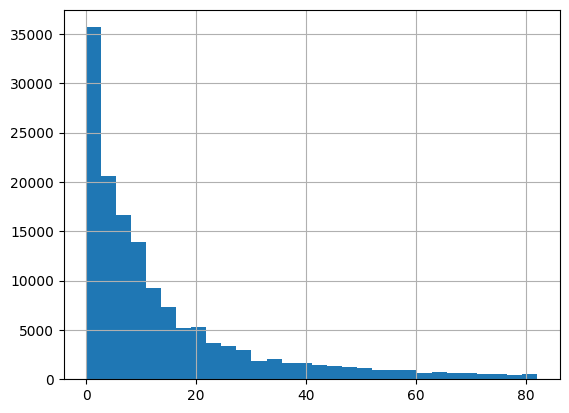

In [16]:
# up to 90th percentile
df_sales_artist.hist(range = (0,82), bins=30)

<AxesSubplot:>

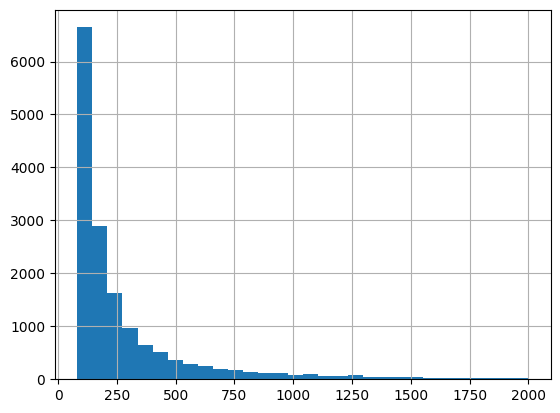

In [17]:
# High Earners: > 90th percentile 
df_sales_artist[df_sales_artist > 82].hist(range=(82, 2000), bins=30)

In [18]:
df.head()

,_id,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,url,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count
0,1599688803.5175&//girlbanddublin.bandcamp.com/...,https://f4.bcbits.com/img/a0206405257_7.jpg,a,2020-09-09 22:00:03.517499904,gb,,United Kingdom,a,$9.99,9.99,Live at Vicar Street,2.064053e+08,//girlbanddublin.bandcamp.com/album/live-at-vi...,9.99,NaN,Girl Band,USD,,9.99,NaN,,,NaN
1,1599688805.27838&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a2984241552_7.jpg,a,2020-09-09 22:00:05.278380032,fi,,Finland,a,£1,1.00,Neurogen,2.984242e+09,//maharettarecords.bandcamp.com/album/neurogen,1.00,NaN,Jirah,GBP,,1.30,NaN,,,NaN
2,1599688805.90646&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a3320494770_7.jpg,a,2020-09-09 22:00:05.906460160,fi,,Finland,a,£3,3.00,The Last Snare Bender,3.320495e+09,//maharettarecords.bandcamp.com/album/the-last...,3.00,NaN,D-Ther,GBP,,3.90,NaN,,,NaN
3,1599688806.94234&//alicesitski.bandcamp.com/al...,https://f4.bcbits.com/img/0020476345_37.jpg,p,2020-09-09 22:00:06.942339840,gb,,United Kingdom,a,€10.50,10.50,Limited Edition Compact Disc,NaN,//alicesitski.bandcamp.com/album/white-noise-tv,10.50,NaN,WHITE NOISE TV,EUR,WHITE NOISE TV,12.39,20476345.0,,,NaN
4,1599688809.07942&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a3428873396_7.jpg,t,2020-09-09 22:00:09.079420160,us,,United States,t,$1,1.00,O Ruthless Great Divine Director,3.428873e+09,//linguaignota.bandcamp.com/track/o-ruthless-g...,1.00,NaN,LINGUA IGNOTA,USD,,1.00,NaN,,,NaN


## Does the spend change by country? 

<AxesSubplot:>

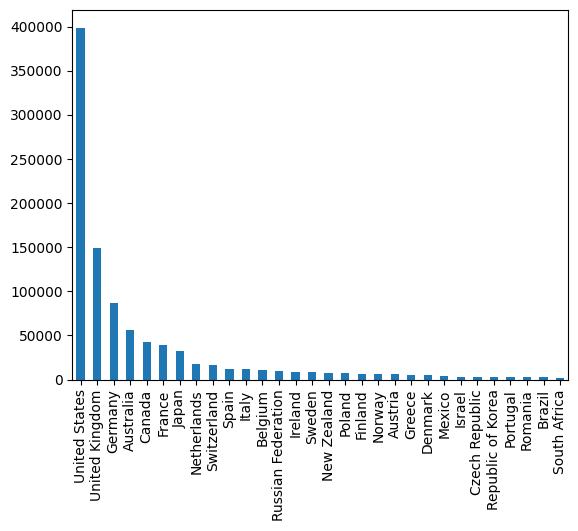

In [20]:
# number of sales per country
df.country.value_counts().head(30).plot(kind='bar')

In [21]:
# A more complex aggregation
stats_country = (df
 .groupby(['country'])
 .agg(
     nbr_sold = ("_id", "count"),
     median_spend = ("amount_paid_usd", "median"),
     mean_spend = ("amount_paid_usd", "mean")
 )
 .sort_values("nbr_sold", ascending=False).head(20)
)
stats_country

,nbr_sold,median_spend,mean_spend
country,,,
United States,398999,7.00,9.893638
United Kingdom,149124,6.00,8.677396
Germany,86589,5.00,8.072193
Australia,55761,5.85,8.726673
Canada,42451,6.66,8.466442
France,39250,5.88,9.132290
Japan,32544,4.00,6.581460
Netherlands,17106,5.00,8.372477
Switzerland,16214,5.00,8.223298


## Item Type

- item_type: denotes the type of object. a for digital albums, p for physical items, and t for digital tracks.
- slug_type: also denotes the type of object. a for all albums, p for merch, and t for tracks.

In [22]:
map_itemtype = {"a":"Digital Album", "p":"Physical Items", "t":"Digital Tracks"}
map_slugtype = {"a":"albums", "p":"merch", "t":"tracks"}

df['item_type'] = df['item_type'].map(map_itemtype)
df['slug_type'] = df['slug_type'].map(map_slugtype)

In [23]:
df[['item_type', 'slug_type']].sample(10)

,item_type,slug_type
811024,Digital Tracks,tracks
749255,Digital Album,albums
34111,Digital Tracks,tracks
926447,Physical Items,albums
127241,Digital Tracks,tracks
194410,Physical Items,albums
486992,Digital Album,albums
806168,Physical Items,merch
467845,Digital Album,albums
401417,Digital Tracks,tracks


In [24]:
stats_items = (
    df
    .groupby(["item_type", "slug_type"])
    .agg(
        nbr_sold = ("_id", "count"),
        total_spend = ("amount_paid_usd", "sum"),
        median_spend = ("amount_paid_usd", "median"),
        mean_spend = ("amount_paid_usd", "mean")
    )
)
stats_items

nbr_sold  total_spend  median_spend  mean_spend
item_type      slug_type                                                 
Digital Album  albums       481584   3455076.75          6.44    7.174401
Digital Tracks tracks       271015    601116.51          1.50    2.218019
Physical Items albums       187825   3543112.99         16.33   18.863905
               merch         47992   1060902.43         20.00   22.105818

## Relation between price and amount paid

In [25]:
# The item price and amount paid are not necesarily equal!!
df[['item_price', 'amount_paid']].sample(10)

,item_price,amount_paid
890962,2.50,2.50
489142,6.00,6.00
641234,2.00,2.00
356188,35.00,40.00
451989,0.00,6.00
999516,19.99,19.99
958441,10.00,11.00
93053,1.00,3.00
909480,24.99,25.00
329400,1.00,1.00


In [26]:
# compute ratio of "overpayment"
df['overpaid_ratio'] = np.where(df['item_price'] == 0, 0, df['amount_paid'] / df['item_price'])

In [27]:
df['overpaid_ratio'].quantile(np.arange(0, 1.1, 0.1))

0.0       0.000000
0.1       0.000000
0.2       1.000000
0.3       1.000000
0.4       1.000000
0.5       1.000000
0.6       1.000000
0.7       1.000000
0.8       1.000000
0.9       1.142857
1.0    1249.999981
Name: overpaid_ratio, dtype: float64

In [30]:
# average ratio for > 1 rows
df[ df['overpaid_ratio'] > 1 ].overpaid_ratio.median()

1.125

In [31]:
global_overpaid_percent = df.amount_paid.sum() / df.item_price.sum() - 1
global_overpaid_percent

0.15662783084761278

In [32]:
# amount in USD of sales that were "overpaid" is $1.4M
total_sales_usd = df.amount_paid_usd.sum()
total_sales_usd * global_overpaid_percent

1398892.5263923125

In [33]:
total_sales_usd

8931315.199999997

## Aggregate data by date

In [34]:
df['date'] = df.utc_date.dt.date

In [35]:
df[['utc_date', 'date']].head()

,utc_date,date
0,2020-09-09 22:00:03.517499904,2020-09-09
1,2020-09-09 22:00:05.278380032,2020-09-09
2,2020-09-09 22:00:05.906460160,2020-09-09
3,2020-09-09 22:00:06.942339840,2020-09-09
4,2020-09-09 22:00:09.079420160,2020-09-09


<AxesSubplot:>

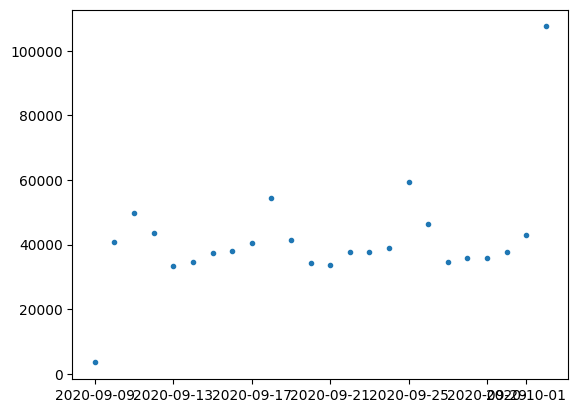

In [36]:
df.date.value_counts().plot(style='.')

## Is there a pattern related to weekdays?

In [37]:
df['dayofweek'] = df.utc_date.dt.day_of_week
df['weekday_name'] = df.utc_date.dt.day_name()

In [39]:
# Fridays (have more sales and higher overpaid_ratio)
(df
 .groupby(["dayofweek", "weekday_name"])
 .agg(
     median_sales = ("amount_paid_usd", "median"),
     overpaid_ratio = ("overpaid_ratio", "mean")
 )
)

,,median_sales,overpaid_ratio
dayofweek,weekday_name,,
0,Monday,5.920,1.040484
1,Tuesday,5.870,1.088202
2,Wednesday,5.840,1.035648
3,Thursday,5.755,1.060151
4,Friday,7.160,1.074316
5,Saturday,5.000,1.039405
6,Sunday,5.120,1.036285


### Linear Regression with TF-IDF

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import eli5

In [ ]:
df.slug_type.value_counts()

In [41]:
df_tracks = df.query("slug_type == 'tracks'")
df_tracks.head()

,_id,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,url,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count,overpaid_ratio,date,dayofweek,weekday_name
4,1599688809.07942&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a3428873396_7.jpg,Digital Tracks,2020-09-09 22:00:09.079420160,us,,United States,tracks,$1,1.00,O Ruthless Great Divine Director,3.428873e+09,//linguaignota.bandcamp.com/track/o-ruthless-g...,1.00,NaN,LINGUA IGNOTA,USD,,1.00,NaN,,,NaN,1.0,2020-09-09,2,Wednesday
5,1599688812.69267&//sofiefatouretchi.bandcamp.c...,https://f4.bcbits.com/img/a0772371002_7.jpg,Digital Tracks,2020-09-09 22:00:12.692670208,us,,United States,tracks,$1.29,1.29,Try to Reach Me,7.723710e+08,//sofiefatouretchi.bandcamp.com/track/try-to-r...,1.29,NaN,Sofie,USD,Cult Survivor,1.29,NaN,,,NaN,1.0,2020-09-09,2,Wednesday
8,1599688823.53451&//favoriterecordings.bandcamp...,https://f4.bcbits.com/img/a1858161280_7.jpg,Digital Tracks,2020-09-09 22:00:23.534509824,ch,,Switzerland,tracks,€1.99,1.99,Better Day (Hard Soul Mix),1.858161e+09,//favoriterecordings.bandcamp.com/track/better...,1.99,NaN,Djeneba,EUR,French Disco Boogie Sounds Vol.4,2.35,NaN,,,NaN,1.0,2020-09-09,2,Wednesday
9,1599688825.93404&//amandapalmer.bandcamp.com/t...,https://f4.bcbits.com/img/a2371143964_7.jpg,Digital Tracks,2020-09-09 22:00:25.934040064,us,,United States,tracks,$1,1.00,It's A Fire,2.371144e+09,//amandapalmer.bandcamp.com/track/its-a-fire,1.00,NaN,Amanda Palmer & Rhiannon Giddens,USD,,1.00,NaN,,,NaN,1.0,2020-09-09,2,Wednesday
11,1599688836.80575&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a2070002729_7.jpg,Digital Tracks,2020-09-09 22:00:36.805750016,us,,United States,tracks,$1,1.00,JOLENE,2.070003e+09,//linguaignota.bandcamp.com/track/jolene,1.00,NaN,LINGUA IGNOTA,USD,,1.00,NaN,,,NaN,1.0,2020-09-09,2,Wednesday


In [42]:
df_merch = df.query("slug_type == 'merch'").copy()
df_merch.head()

,_id,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,url,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count,overpaid_ratio,date,dayofweek,weekday_name
33,1599688890.96119&//ragana.bandcamp.com/merch/d...,https://f4.bcbits.com/img/0007570998_37.jpg,Physical Items,2020-09-09 22:01:30.961189888,us,,United States,merch,$15,15.0,dark woods tshirt,NaN,//ragana.bandcamp.com/merch/dark-woods-tshirt,15.0,NaN,RAGANA,USD,,15.00,7570998.0,,,NaN,1.0,2020-09-09,2,Wednesday
62,1599688925.39795&//chuwanaga.bandcamp.com/merc...,https://f4.bcbits.com/img/0020347767_37.jpg,Physical Items,2020-09-09 22:02:05.397949952,gb,,United Kingdom,merch,€30,30.0,In The Red Vol. 1 & 2 - Vinyl Bundle,NaN,//chuwanaga.bandcamp.com/merch/in-the-red-vol-...,30.0,NaN,Chuwanaga,EUR,,35.41,20347767.0,,,NaN,1.0,2020-09-09,2,Wednesday
70,1599688926.61447&//thewhiteswan.bandcamp.com/m...,https://f4.bcbits.com/img/0021558428_37.jpg,Physical Items,2020-09-09 22:02:06.614469888,ca,,Canada,merch,$25,25.0,Limited Edition Gold Sparkle Baseball T,NaN,//thewhiteswan.bandcamp.com/merch/limited-edit...,25.0,NaN,The White Swan,USD,,25.00,21558428.0,,,NaN,1.0,2020-09-09,2,Wednesday
71,1599688926.84906&//thewhiteswan.bandcamp.com/m...,https://f4.bcbits.com/img/0021558428_37.jpg,Physical Items,2020-09-09 22:02:06.849060096,ca,,Canada,merch,$25,25.0,Limited Edition Gold Sparkle Baseball T,NaN,//thewhiteswan.bandcamp.com/merch/limited-edit...,25.0,NaN,The White Swan,USD,,25.00,21558428.0,,,NaN,1.0,2020-09-09,2,Wednesday
95,1599688948.66233&//xoth.bandcamp.com/merch/gre...,https://f4.bcbits.com/img/0013158520_37.jpg,Physical Items,2020-09-09 22:02:28.662329856,us,,United States,merch,$6,6.0,Green Embroidered Xoth Logo Patch,NaN,//xoth.bandcamp.com/merch/green-embroidered-xo...,6.0,NaN,Xoth,USD,,6.00,13158520.0,,,NaN,1.0,2020-09-09,2,Wednesday


In [ ]:
# !pip install wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, 
                   max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

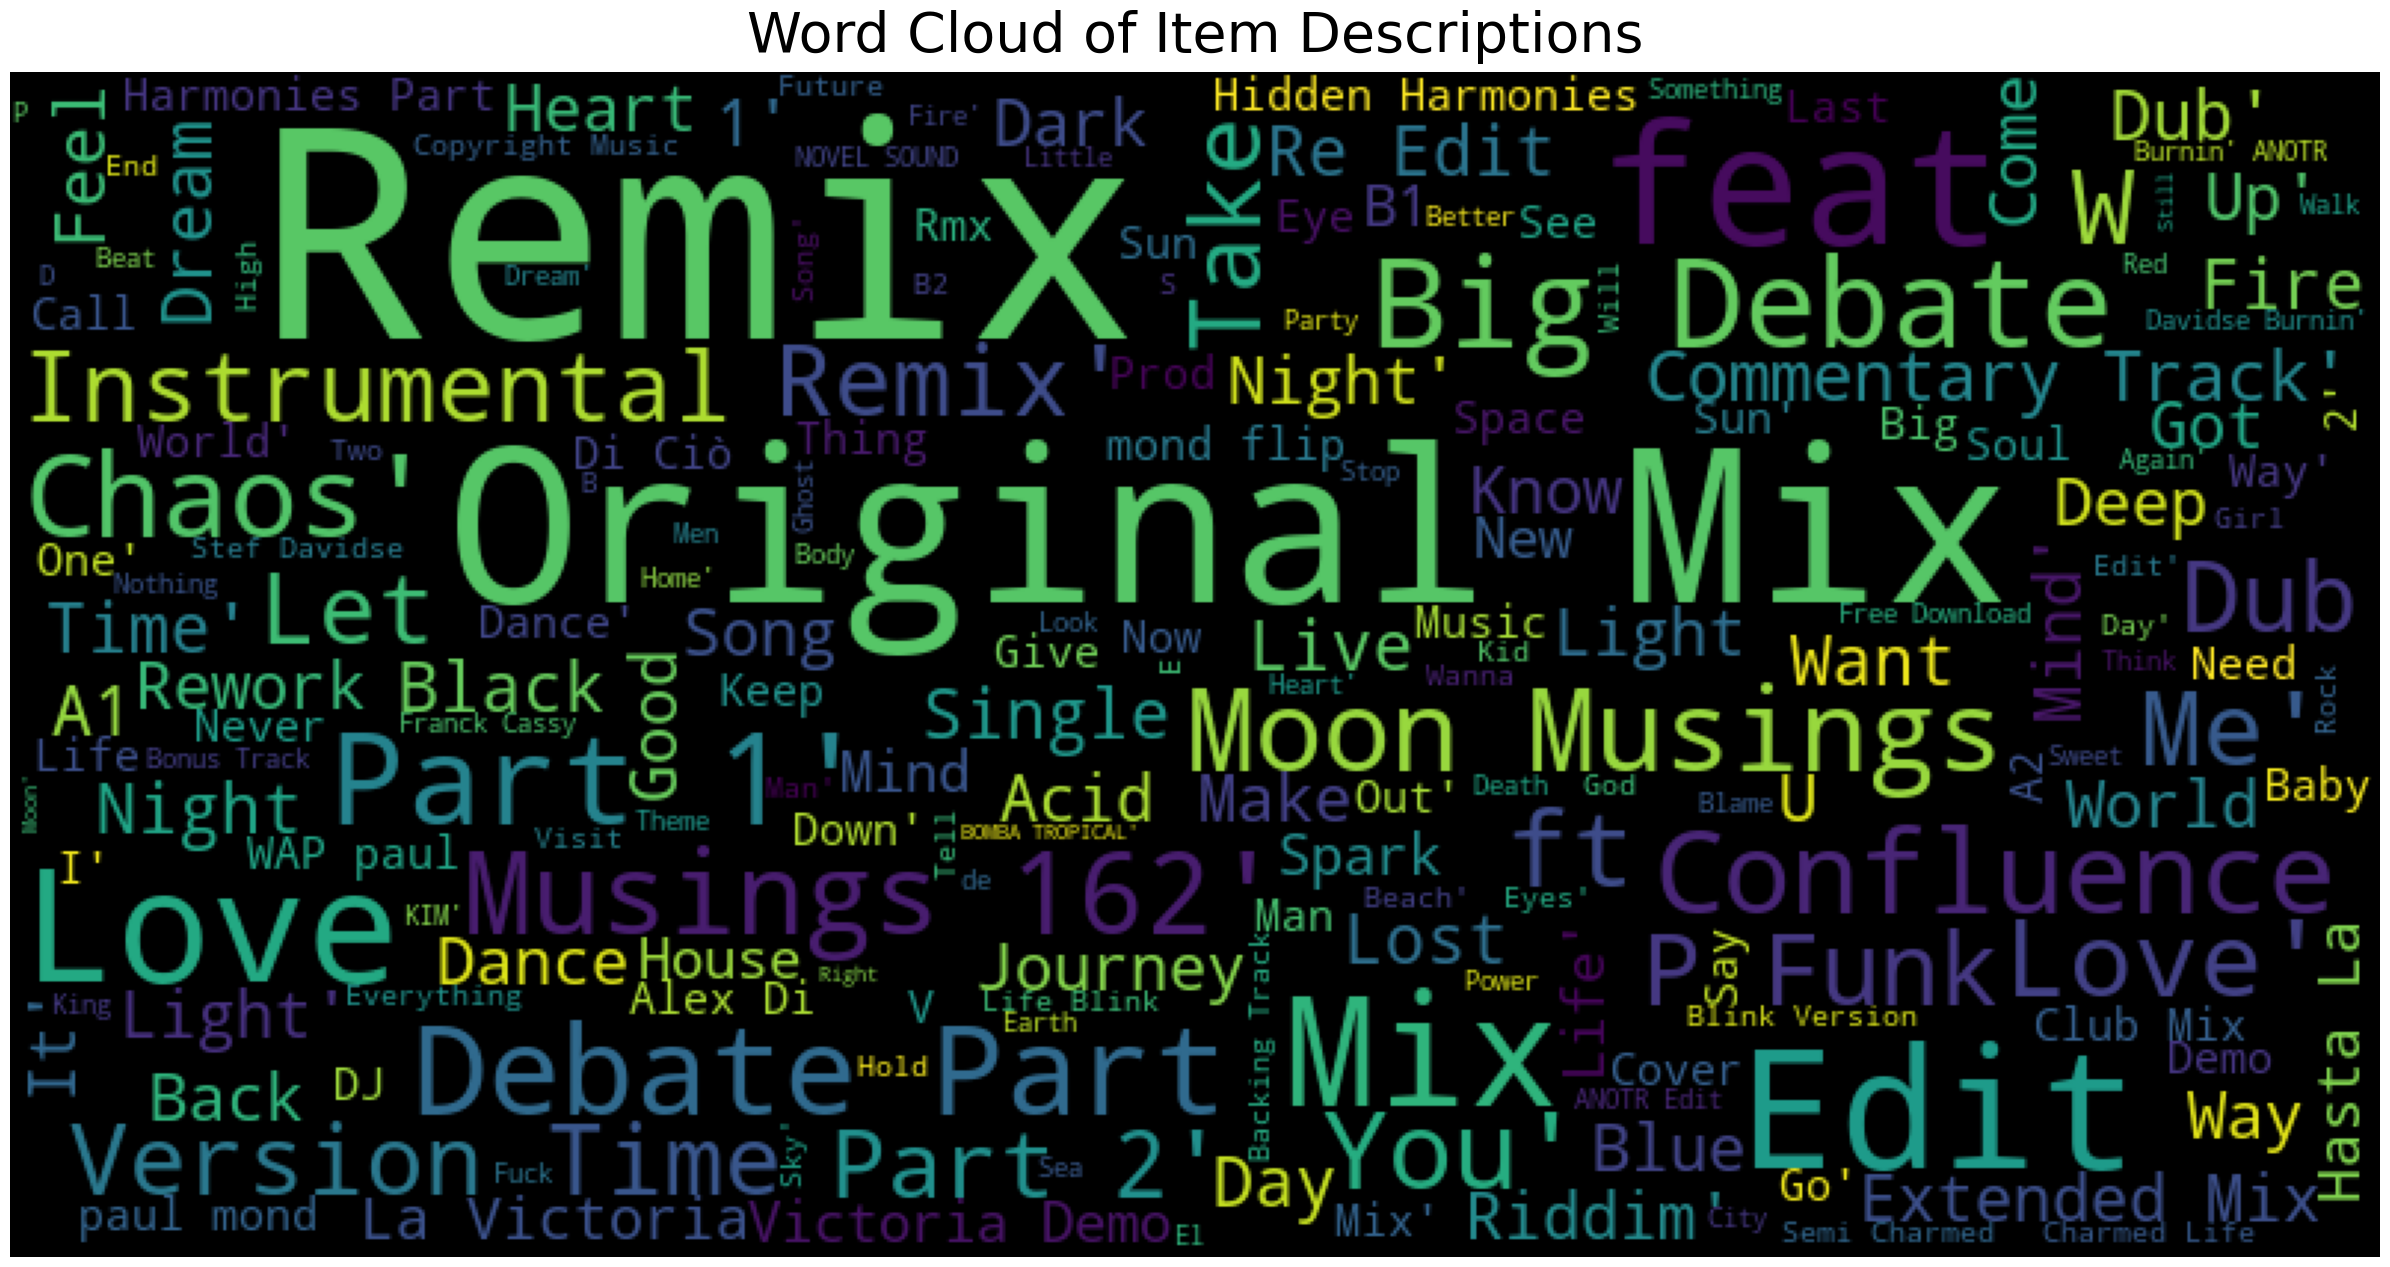

In [44]:
plot_wordcloud(df_tracks.item_description.to_list(),
               title="Word Cloud of Item Descriptions")

## Which combinations of 2 words in the track name are more predictive of price?

Documentation: 

- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): Used to convert text into a numeric representation
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression): Used to fit a linear model.

In [45]:
track_price = df_tracks.item_price.values
track_name = df_tracks.item_description.to_list()

track_price[:3], track_name[:3]

(array([1.        , 1.28999996, 1.99000001]),
 ['O Ruthless Great Divine Director',
  'Try to Reach Me',
  'Better Day (Hard Soul Mix)'])

In [61]:
tfidf = TfidfVectorizer(stop_words=None, 
                        ngram_range=(1, 2), 
                        lowercase=True, max_features=100000)

In [62]:
tfidf.fit(track_name)

TfidfVectorizer(max_features=100000, ngram_range=(1, 2))

In [63]:
X_all = tfidf.transform(track_name)

In [64]:
X_all

<271015x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1266587 stored elements in Compressed Sparse Row format>

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_all, track_price)

LinearRegression()

In [67]:
df_coefs = pd.DataFrame({
    "variable": tfidf.get_feature_names_out(),
    "coefficient": lr.coef_
})
df_coefs = df_coefs.sort_values("coefficient", ascending=False)
df_coefs.head(20)

,variable,coefficient
75545,school classic,2355.557122
95466,we remember,1564.096339
37044,hanada,1206.648212
40370,huge,1145.293184
52494,machi,1134.787738
89746,tion,1086.932531
76498,session live,1057.377624
68466,previously,1044.957161
45797,journey feat,985.214089
71296,remix ver,944.120466


In [53]:
df_coefs.sort_values("coefficient", ascending=True).head(50)

,variable,coefficient
5677,feat ugu,-789.546614
12857,out dj,-602.045864
19863,yourself byron,-548.850647
10051,love friday,-508.908013
6276,friday mix,-508.908013
15645,stabal session,-341.982593
9857,lng mojeaux,-283.425756
11167,mojeaux prove,-283.425756
572,alexander neal,-157.188066
12340,of melody,-145.609753
